In [2]:
#import healpy as hp
import skyproj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import math
from tqdm import trange
from matplotlib.patches import Circle
import os

In [1]:
import pandas as pd

file_path = r'C:\Users\21rgo\Downloads\Host_Properties (1).csv'
df = pd.read_csv(file_path, on_bad_lines='skip')

ras = df['RA'].to_numpy()
decs = df['Dec'].to_numpy()

print(decs)

# Display the first few rows of the DataFrame to verify it was read correctly
print(df.head())


[-69.201639 -61.850472 -54.571417 -54.557333 -50.41425  -43.598036
 -41.436194 -34.204444 -34.106207 -33.080841 -25.422926 -24.963139
  21.68297   22.820447  27.333361  27.432778  28.83725   33.546928
  34.859444  36.618778  37.604892  37.807111  41.150778  44.09363
  51.164693  54.523889  56.729056  58.418722  61.609194  69.462583
  70.144366  70.364444]
       Galaxy          RA        Dec  Distance Method    m_B    A_B  \
0      IC5052  313.023208 -69.201639      5.37   TRGB  11.68  0.220   
1      IC4951  302.382375 -61.850472      8.98   TRGB  13.97  0.017   
2  ESO154-G23   44.209917 -54.571417      5.74   TRGB  12.71  0.070   
3     NGC7090  324.120250 -54.557333      9.29   TRGB  11.33  0.100   
4      IC1959   53.302458 -50.414250      6.07   TRGB  13.20  0.050   

         M_B  Tidal_Index  Density_Env    m_K        M_K LMC_SMC  
0 -17.189871         -1.1        -1.00   9.32 -19.329871     SMC  
1 -15.813382         -0.8        -0.66  11.00 -18.766382     SMC  
2 -16.154559  

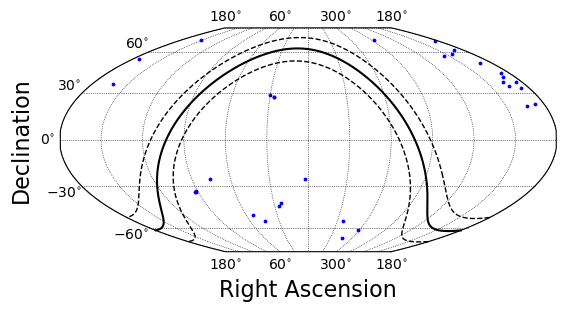

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
sp.scatter(ras,decs,3,color='b')
sp.draw_milky_way()
plt.show()


In [3]:
df  #distance in MPC

,Galaxy,RA,Dec,Distance,Method,m_B,A_B,M_B,Tidal_Index,Density_Env,m_K,M_K,LMC_SMC
0,IC5052,313.023208,-69.201639,5.37,TRGB,11.68,0.220,-17.189871,-1.1,-1.00,9.32,-19.329871,SMC
1,IC4951,302.382375,-61.850472,8.98,TRGB,13.97,0.017,-15.813382,-0.8,-0.66,11.00,-18.766382,SMC
2,ESO154-G23,44.209917,-54.571417,5.74,TRGB,12.71,0.070,-16.154559,-1.1,-0.22,9.80,-18.994559,SMC
3,NGC7090,324.120250,-54.557333,9.29,TRGB,11.33,0.100,-18.610079,-1.3,-1.00,8.40,-21.440079,LMC
4,IC1959,53.302458,-50.414250,6.07,TRGB,13.20,0.050,-15.765943,-1.1,-0.24,11.03,-17.885943,SMC
5,ESO245-G05,26.265571,-43.598036,4.46,TRGB,12.70,0.070,-15.616674,-0.5,-0.32,10.30,-17.946674,SMC
6,NGC0625,23.769292,-41.436194,3.92,TRGB,11.59,0.070,-16.446430,-0.2,-0.75,9.33,-18.636430,SMC
7,HIPASSJ0607,91.832830,-34.204444,9.40,TRGB,14.09,0.150,-15.925639,1.6,0.19,11.50,-18.365639,SMC
8,NGC2188,92.539708,-34.106207,8.22,TRGB,12.14,0.140,-17.574359,0.9,-0.17,11.60,-17.974359,SMC
9,ESO364-G29,91.438425,-33.080841,8.81,TRGB,13.67,0.190,-16.244880,0.1,0.07,12.73,-16.994880,SMC


In [6]:
import pandas as pd

# Load the CSV file
df2 = pd.read_csv(r"C:\Users\21rgo\Downloads\EDDtable26Apr2024003518.txt")

# All CF4 TRGB and CF4 Initial candadates


C:\Users\21rgo\AppData\Local\Temp\ipykernel_19096\1451364776.py:4: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"C:\Users\21rgo\Downloads\EDDtable26Apr2024003518.txt")


In [7]:
df2


,HYPERLEDA,Kourkchi-Tully Groups,Kourkchi-Tully Groups.1,Kourkchi-Tully Groups.2,All CF4 Individual Distances,All CF4 Individual Distances.1,All CF4 Individual Distances.2,All CF4 Individual Distances.3,All CF4 TRGB,CF4 Initial Candidates,CF4 Initial Candidates.1,CF4 Initial Candidates.2,CF4 Initial Candidates.3,CF4 Initial Candidates.4
0,pgc,Name,K_t,lgL_K,DM,eDM,RA,DE,D,u_mag,g_mag,r_mag,i_mag,z_mag
1,%7s,%27s,%5.2f,%5.2f,%6.3f,%5.3f,%8.4f,%8.4f,%5.2f,%6.2f,%6.2f,%6.2f,%6.2f,%6.2f
2,---,NaN,mag,suns,mag,mag,deg,deg,Mpc,mag,mag,mag,mag,mag
3,The Catalogue of Principal Galaxies (PGC) Number,Common name,"Ks total magnitude, extinction corrected",Log intrinsic K luminosity at group distance,Distance modulus weighted average of all measu...,Error of weghted average modulus,Right ascension J2000,Declination J2000,TRGB distance; average of F814W and IR (F110W+...,SDSS u-band asymptotic magnitude,SDSS g-band asymptotic magnitude,SDSS r-band asymptotic magnitude,SDSS i-band asymptotic magnitude,SDSS z-band asymptotic magnitude
4,2,NaN,NaN,NaN,34.523,0.460,0.0070,47.2745,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73980,9003285,NaN,NaN,NaN,36.842,0.1,354.3419,19.9315,NaN,NaN,NaN,NaN,NaN,NaN
73981,9003286,NaN,NaN,NaN,37.812,0.1,340.4511,17.6285,NaN,NaN,NaN,NaN,NaN,NaN
73982,9003287,NaN,NaN,NaN,37.512,0.11,131.475,43.8416,NaN,NaN,NaN,NaN,NaN,NaN
73983,9003288,NaN,NaN,NaN,37.032,0.1,196.715,15.575,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd

# Assuming df2 is your DataFrame

# Drop rows where 'All CF4 TRGB.1' column contains NaN values
df2_cleaned = df2.dropna(subset=['All CF4 Individual Distances.2'])
df2_cleaned = df2_cleaned.dropna(subset=['All CF4 Individual Distances'])
df2_cleaned = df2_cleaned.iloc[4:]
df2_cleaned

df2_cleaned['All CF4 Individual Distances'] =pd.to_numeric(df2_cleaned['All CF4 Individual Distances'])
df2_cleaned = df2_cleaned[(df2_cleaned['All CF4 Individual Distances'] < 31)]

df2_cleaned

,HYPERLEDA,Kourkchi-Tully Groups,Kourkchi-Tully Groups.1,Kourkchi-Tully Groups.2,All CF4 Individual Distances,All CF4 Individual Distances.1,All CF4 Individual Distances.2,All CF4 Individual Distances.3,All CF4 TRGB,CF4 Initial Candidates,CF4 Initial Candidates.1,CF4 Initial Candidates.2,CF4 Initial Candidates.3,CF4 Initial Candidates.4
8,35,UGC12894,14.00,7.54,29.730,0.100,0.0938,39.4955,8.84,NaN,NaN,NaN,NaN,NaN
34,143,WLM,9.00,7.71,24.902,0.032,0.4926,-15.4609,0.96,NaN,NaN,NaN,NaN,NaN
55,218,NGC7814,7.18,10.84,30.646,0.080,0.8121,16.1456,14.02,12.60,11.01,10.11,9.62,9.31
98,388,ESO409-015,14.44,7.54,29.650,0.110,1.3830,-28.0983,8.51,NaN,NaN,NaN,NaN,NaN
139,591,UGC00064,12.80,7.98,29.510,0.110,1.9336,40.8759,7.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73858,5808780,NaN,NaN,NaN,29.140,0.09,187.6416,23.2056,6.72,NaN,NaN,NaN,NaN,NaN
73863,5809449,NaN,NaN,NaN,30.130,0.2,188.0428,20.4233,10.59,NaN,NaN,NaN,NaN,NaN
73896,6726347,NaN,NaN,NaN,28.820,0.08,178.0233,54.7923,5.82,NaN,NaN,NaN,NaN,NaN
73906,6740710,NaN,NaN,NaN,27.750,0.09,13.7543,-23.1691,3.54,NaN,NaN,NaN,NaN,NaN


In [ ]:
  #finding less than 450 kpc
import astropy.units as u
    
df2_cleaned = df2_cleaned.apply(pd.to_numeric, errors='coerce')

for index, row in df.iterrows():
        tra = row['RA']
        tdec = row['Dec'] #target ra and dec
        r = row['Distance'] #mpc
        target_coord = coord.SkyCoord(tra,tdec,frame='icrs',unit='deg')
        
        print('+++++++++++')
        print(row['Galaxy'])
        print('+++++++++++')
        
        file_name = str(row['Galaxy'])+'_nearby.csv' #makes the files of neighbors
        file = open(file_name,'w')
        
        
        for index, row in df2_cleaned.iterrows():
           
            # Get rp, thetap, and phip from the current row
            rp = row['All CF4 Individual Distances']
            dist_test_ob = 10**((rp+5)/5)/10**6
            thetap = row['All CF4 Individual Distances.2']  # assuming thetap is in degrees
            phip = row['All CF4 Individual Distances.3']  # assuming phip is in degrees
            test_coord = coord.SkyCoord(thetap,phip,frame='icrs',unit='deg')
            sep_angle = target_coord.separation(test_coord)
            sep_angle_rad = (sep_angle.deg*u.deg).to(u.rad).value
            dist_test = abs(r-dist_test_ob)
            #print(dist_test,sep_angle.deg)
            sep_angle_mpc = r*np.tan(sep_angle_rad)
            


            # Check if rp, thetap, and phip are numeric
            #print(separation)
            if (0.0001 < sep_angle_mpc <= 0.45) and (dist_test <=1):
                print(row['HYPERLEDA'])
                print(row['Kourkchi-Tully Groups'])
                print(row['Kourkchi-Tully Groups.1'])
                print(row['CF4 Initial Candidates'])
                print(row['CF4 Initial Candidates.1'])
                print(row['CF4 Initial Candidates.2'])
                print(row['CF4 Initial Candidates.3'])
                print(row['CF4 Initial Candidates.4'])
                print('Separation Angle', sep_angle.deg)
                print(row['All CF4 Individual Distances'])

                print('====')
                
                #puts the necesary values in the file
                file.write(str(row['All CF4 Individual Distances.2'])+','+str(row['All CF4 Individual Distances.3'] )+','+str(row['HYPERLEDA'])+','+str(row['Kourkchi-Tully Groups.1'])+','+str(sep_angle.deg)+','+str(row['All CF4 Individual Distances'])+'\n')
        file.close()

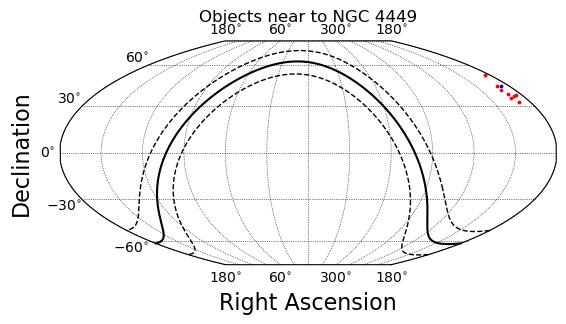

In [13]:
ras = df['RA'].to_numpy() # for NGC4449
decs = df['Dec'].to_numpy()

NGC4449_ras = 187.046261
NGC4449_decs = 44.093630

satellite_ra = [183.944272,  184.373583, 187.118987, 189.666912, 190.562917, 192.721088, 190.990800, 192.305417]
satellite_dec = [52.387196, 37.807111, 37.233626, 32.766807, 38.503333, 41.120458, 43.661209, 35.611944]


fig = plt.figure()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
sp.scatter(NGC4449_ras,NGC4449_decs,3,color='b')
sp.scatter(satellite_ra,satellite_dec,3,color='r')
plt.title("Objects near to NGC 4449",  y=1.05)

sp.draw_milky_way()


plt.show()
#900kpc span is 12.4 degrees

In [35]:
#    s for point size absolute value for sizing 


d= 4.16       
degrees_range = (324/(np.pi*2*d))/2 # /2 because we want to center the target in degree range 
#Which comes from rearrange of degree arclegnth formula:
#pi*2*d(x/360)=.9
print(degrees_range)



6.197860764636308


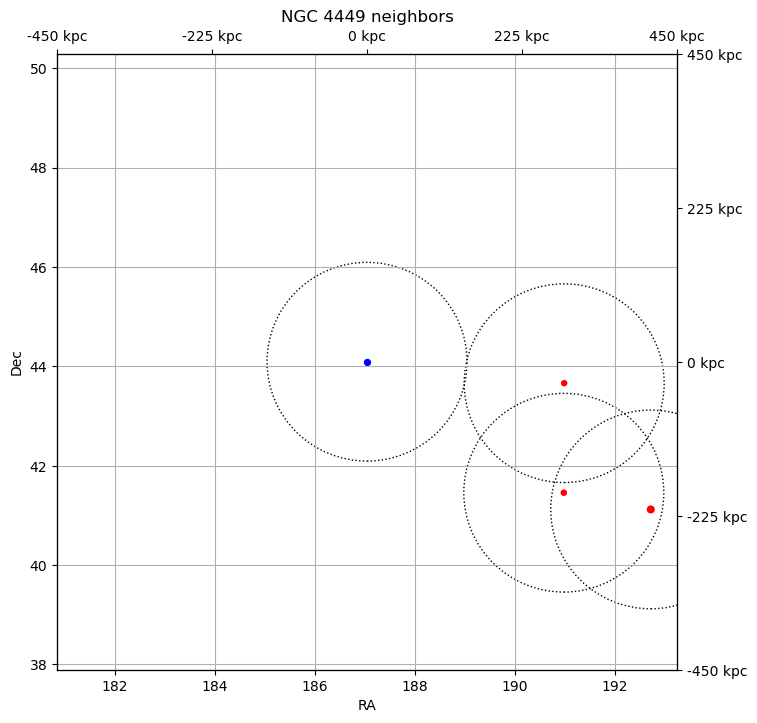

In [36]:
#turn into for loop to make graphs


# Define the center coordinates
center_ra = 187.046261
center_dec = 44.093630
centerk = 18.185467

# Define the range in degrees and kpc
degrees_range = 6.2
kpc_range = 450

file_name = 'NGC4449_nearby.csv'
neighbors = np.genfromtxt(file_name,names=['RA','Dec','pcg','k_mag','Separation','DM'],delimiter=',')
neighbor_ra = neighbors['RA']
neighbor_dec= neighbors['Dec']
k_band = neighbors['k_mag']
k_band = abs(k_band - neighbors['DM'])

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size to make it square
ax.set_title('NGC 4449 neighbors')

ax.scatter(neighbor_ra, neighbor_dec, color='r', s=k_band )
ax.scatter(center_ra, center_dec, color='b', s=centerk)


# Set the limits for the plot
ax.set_xlim(center_ra - degrees_range, center_ra + degrees_range)
ax.set_ylim(center_dec - degrees_range, center_dec + degrees_range)

# Add gridlines
ax.grid(True)
radius = 2
# Create a circle centered at (center_ra, center_dec) with a radius in degrees
circlec = Circle((center_ra, center_dec), radius,  edgecolor='black', facecolor='none', linestyle='dotted', linewidth=1)
ax.add_patch(circlec)
for ra, dec in zip(neighbor_ra, neighbor_dec):
    circle = Circle((ra, dec), radius, edgecolor='black', facecolor='none', linestyle='dotted', linewidth=1)
    ax.add_patch(circle)

# Create a second scale for kpc
x_ticks = np.linspace(center_ra - degrees_range, center_ra + degrees_range, 5)
y_ticks = np.linspace(center_dec - degrees_range, center_dec + degrees_range, 5)
x_tick_labels = np.linspace(-kpc_range, kpc_range, 5)
y_tick_labels = np.linspace(-kpc_range, kpc_range, 5)

ax2 = ax.twiny()  # Create a second x-axis
ax2.set_xlim(ax.get_xlim())  # Set the limits to match the original x-axis
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(['{:.0f} kpc'.format(label) for label in x_tick_labels])

ax3 = ax.twinx()  # Create a second y-axis
ax3.set_ylim(ax.get_ylim())  # Set the limits to match the original y-axis
ax3.set_yticks(y_ticks)
ax3.set_yticklabels(['{:.0f} kpc'.format(label) for label in y_tick_labels]) 
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

plt.show()


C:\Users\21rgo\AppData\Local\Temp\ipykernel_22104\3445108199.py:15: UserWarning: genfromtxt: Empty input file: "IC5052_nearby.csv"
  neighbors = np.genfromtxt(file_name, names=['RA', 'Dec', 'pcg', 'k_mag', 'Separation', 'DM'], delimiter=',', dtype=dtype)
C:\Users\21rgo\AppData\Local\Temp\ipykernel_22104\3445108199.py:15: UserWarning: genfromtxt: Empty input file: "IC4951_nearby.csv"
  neighbors = np.genfromtxt(file_name, names=['RA', 'Dec', 'pcg', 'k_mag', 'Separation', 'DM'], delimiter=',', dtype=dtype)
C:\Users\21rgo\AppData\Local\Temp\ipykernel_22104\3445108199.py:15: UserWarning: genfromtxt: Empty input file: "NGC7090_nearby.csv"
  neighbors = np.genfromtxt(file_name, names=['RA', 'Dec', 'pcg', 'k_mag', 'Separation', 'DM'], delimiter=',', dtype=dtype)
C:\Users\21rgo\AppData\Local\Temp\ipykernel_22104\3445108199.py:15: UserWarning: genfromtxt: Empty input file: "NGC3432_nearby.csv"
  neighbors = np.genfromtxt(file_name, names=['RA', 'Dec', 'pcg', 'k_mag', 'Separation', 'DM'], delimi

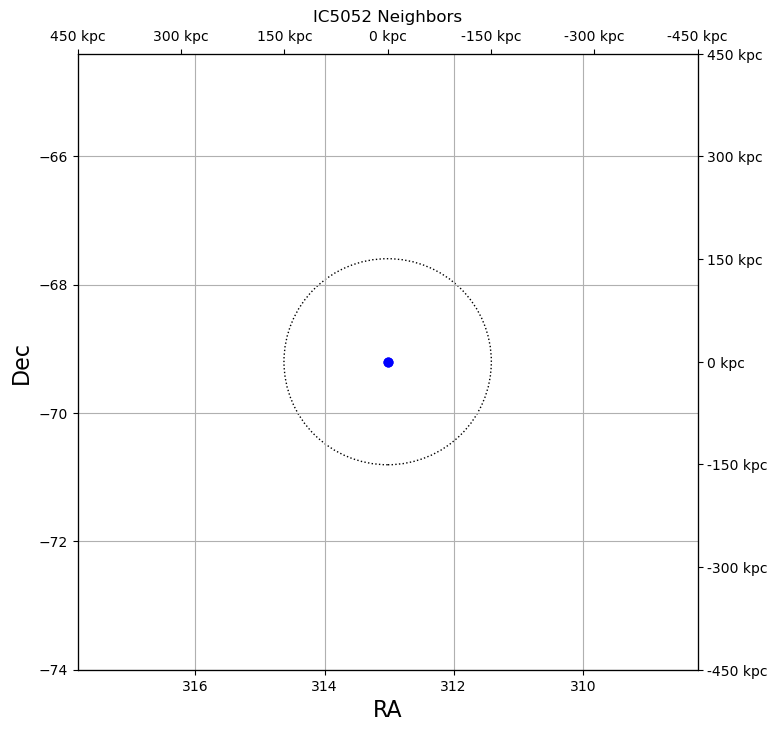

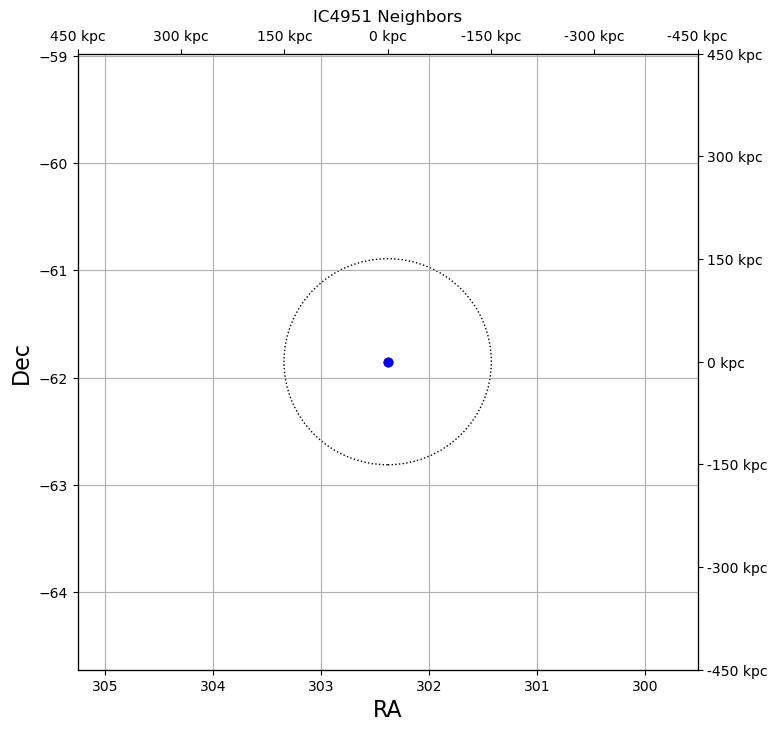

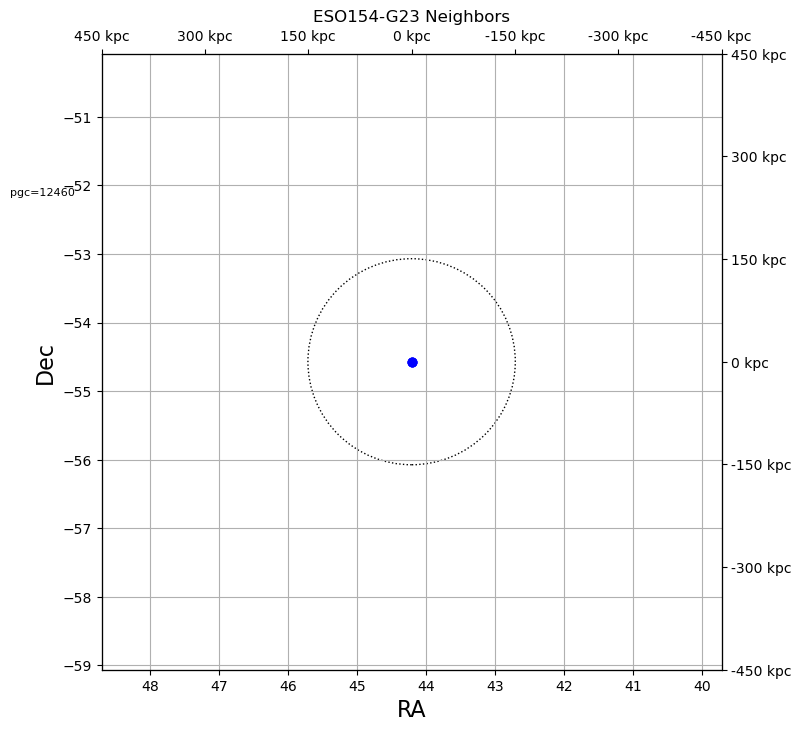

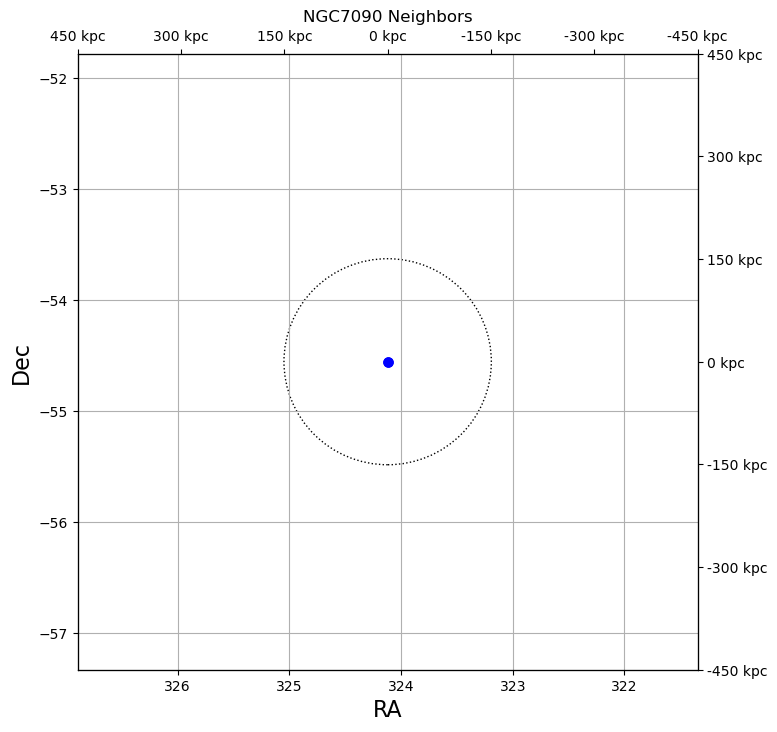

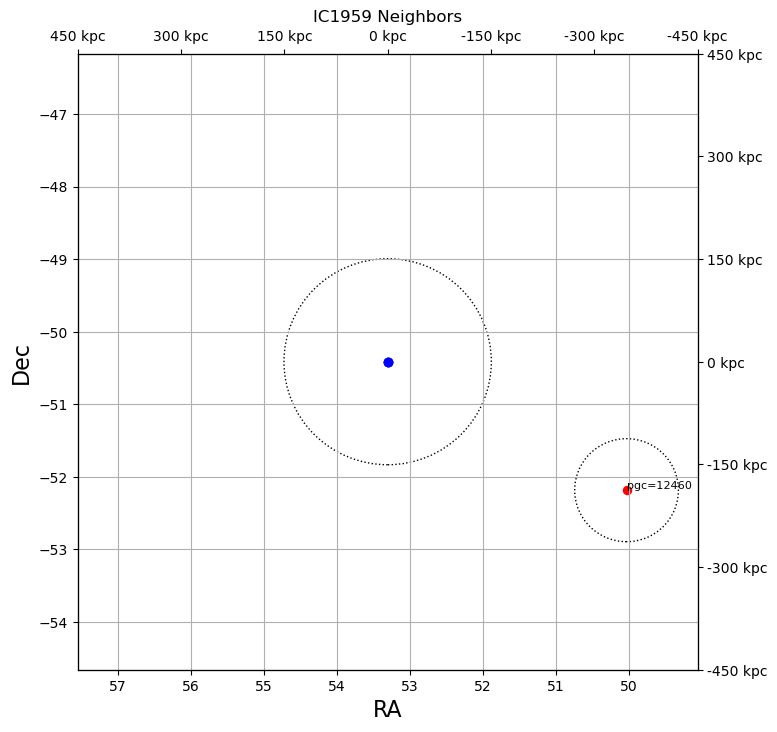

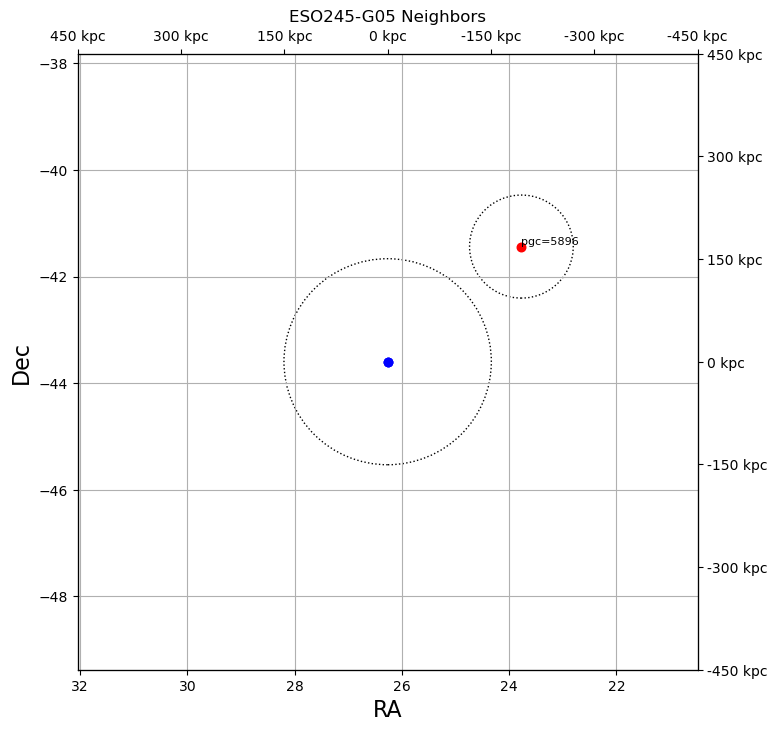

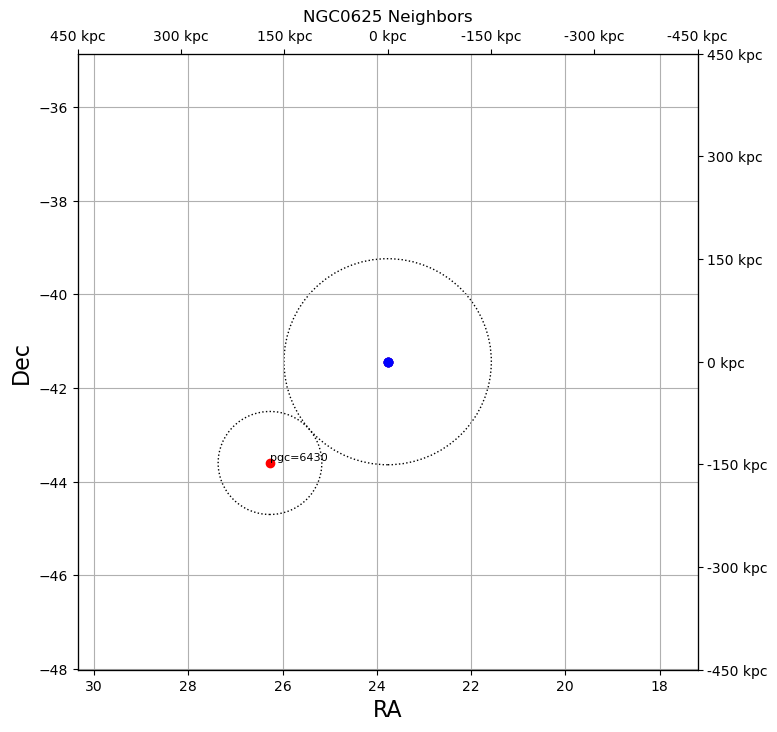

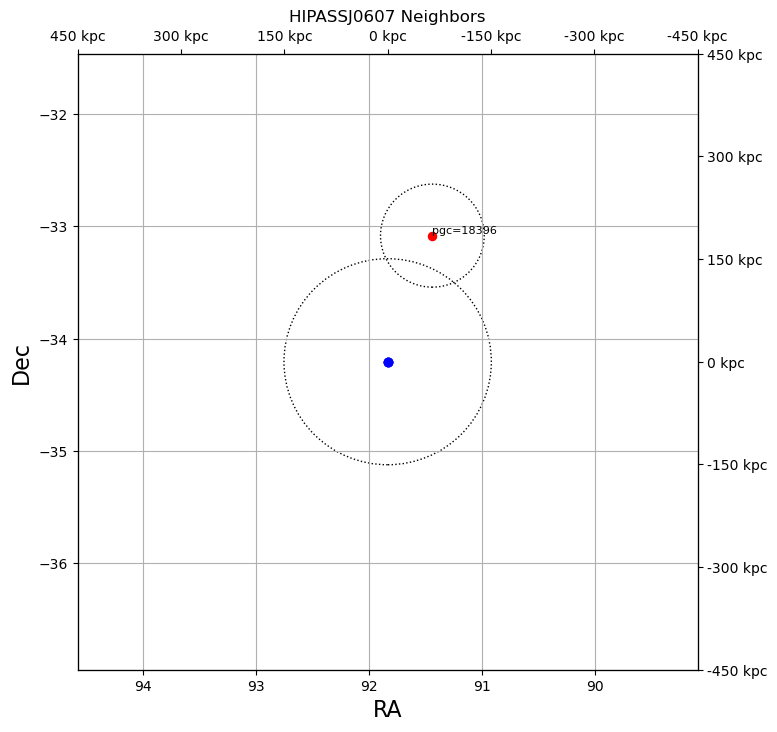

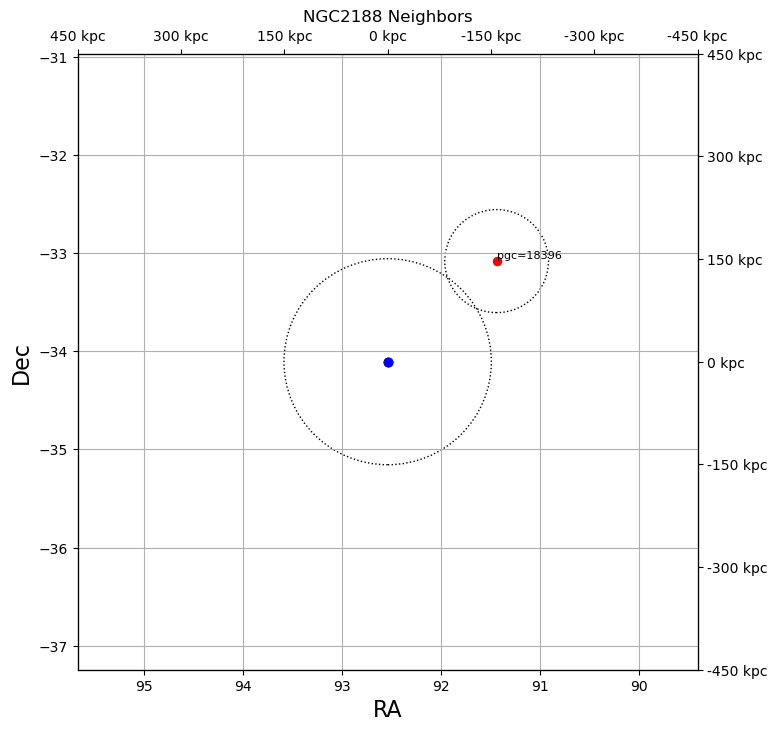

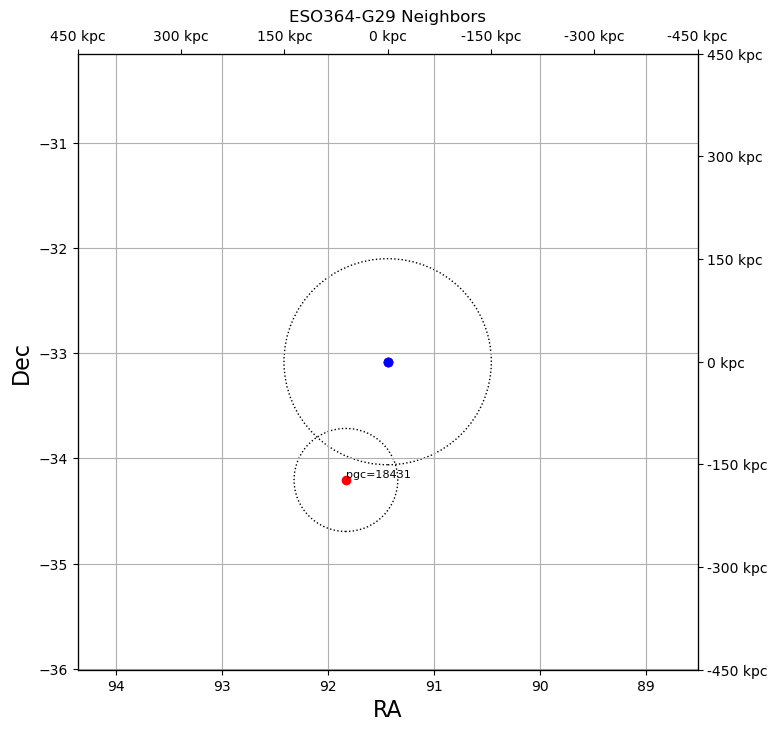

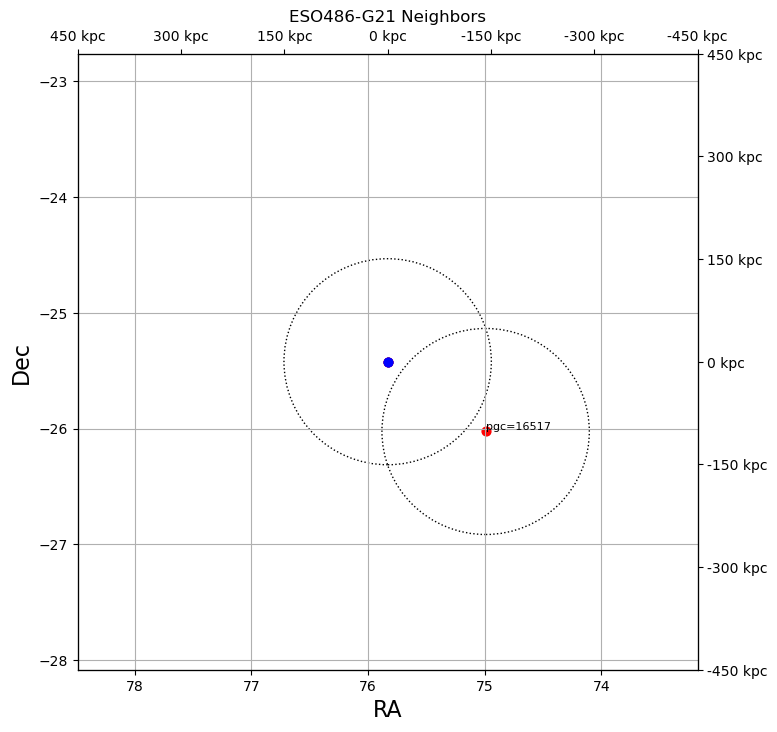

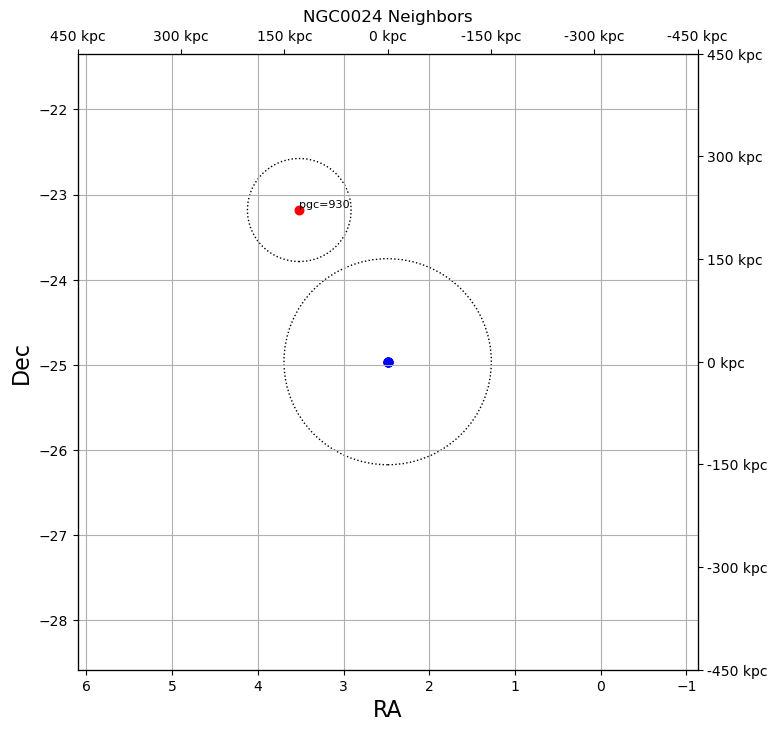

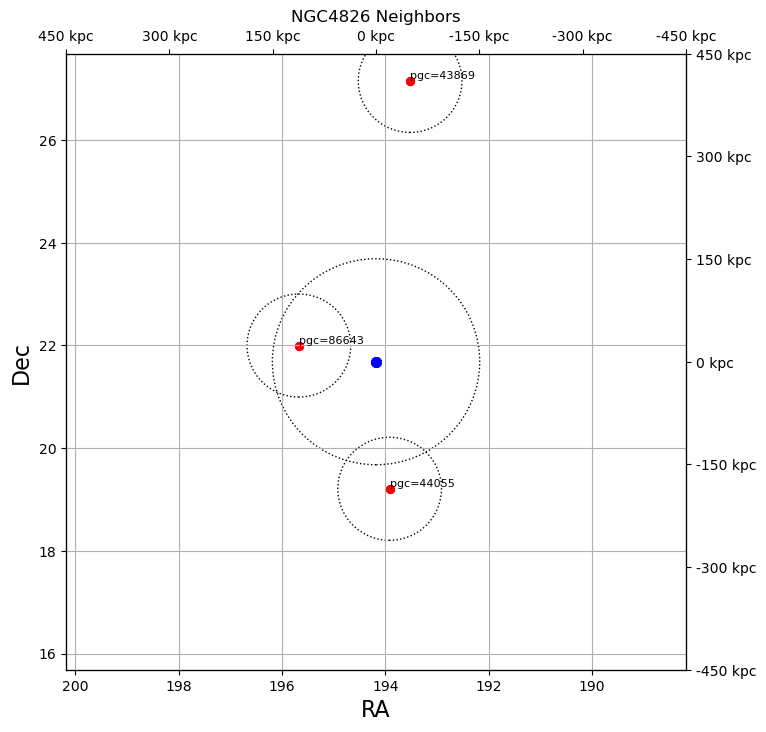

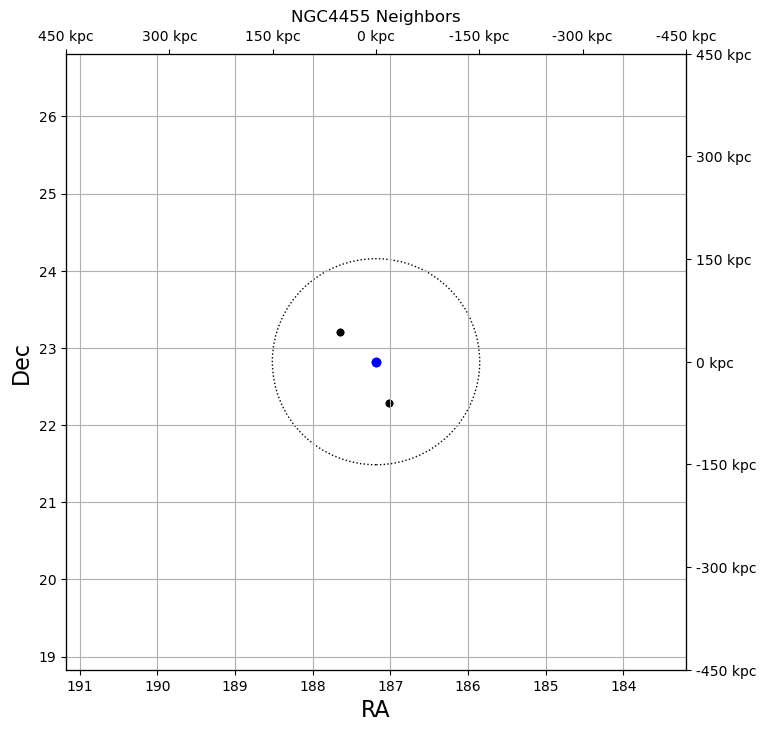

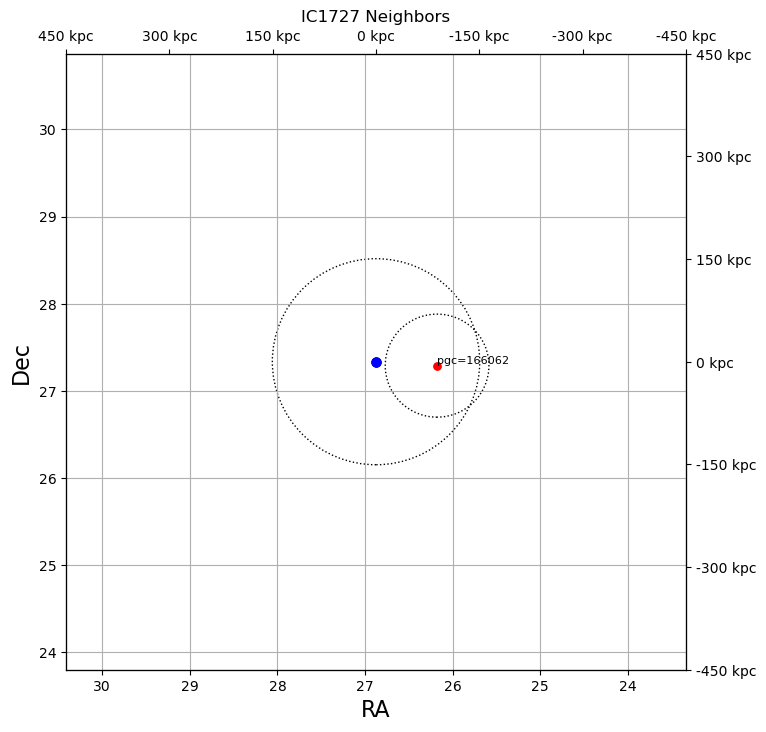

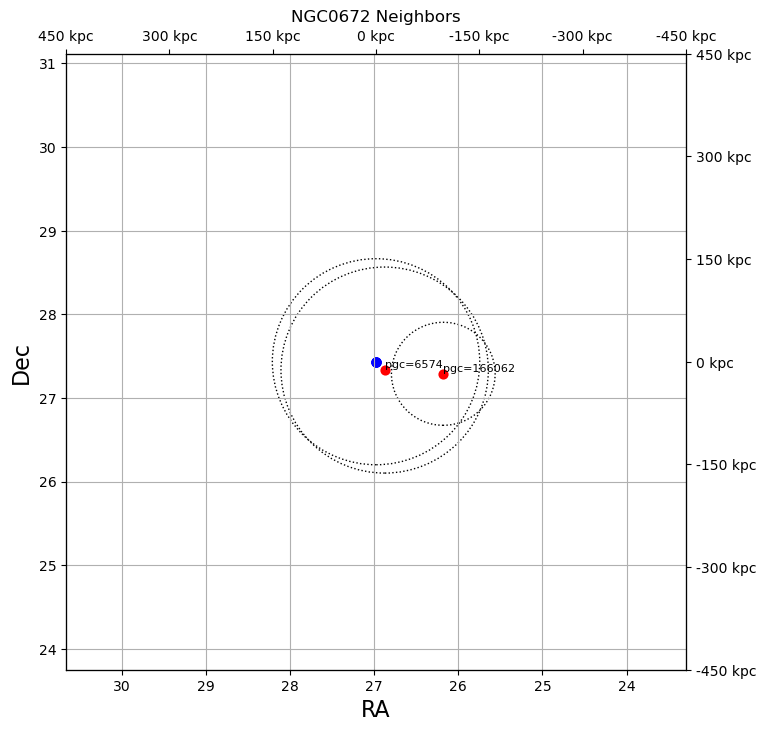

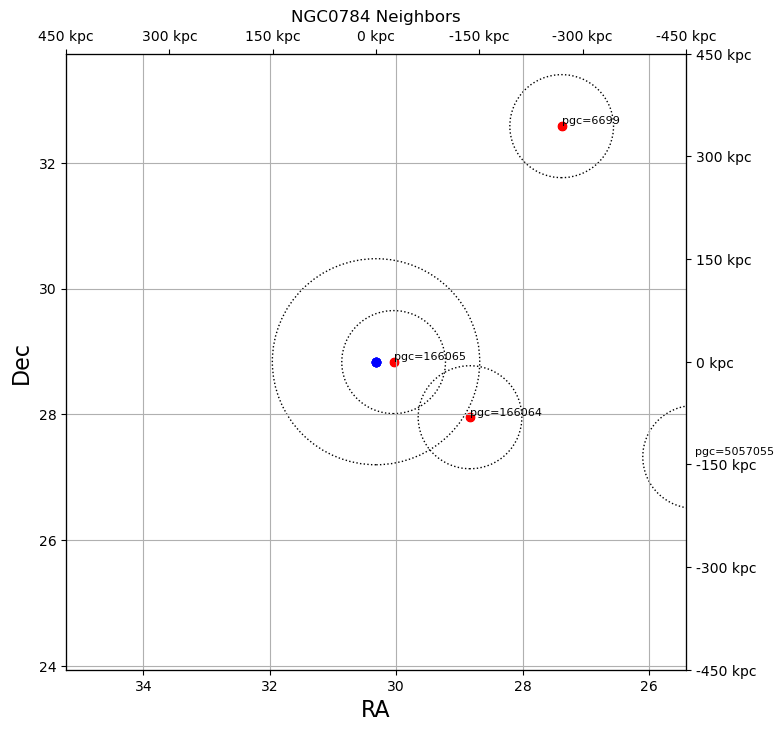

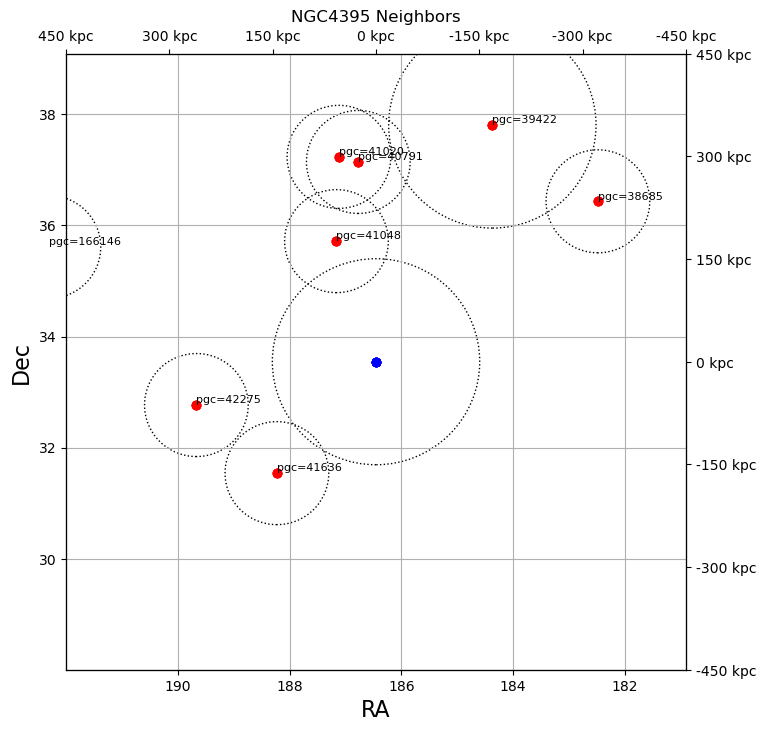

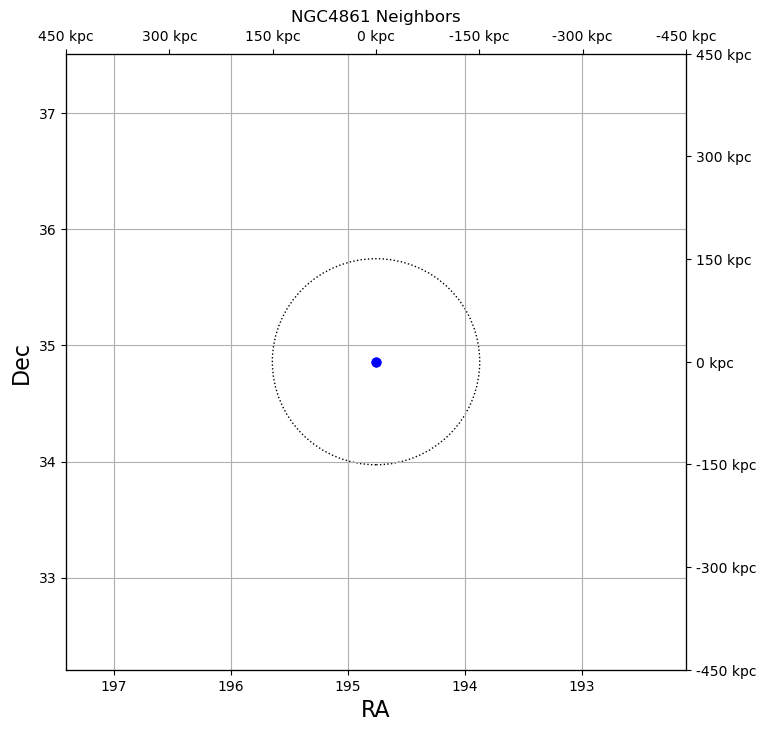

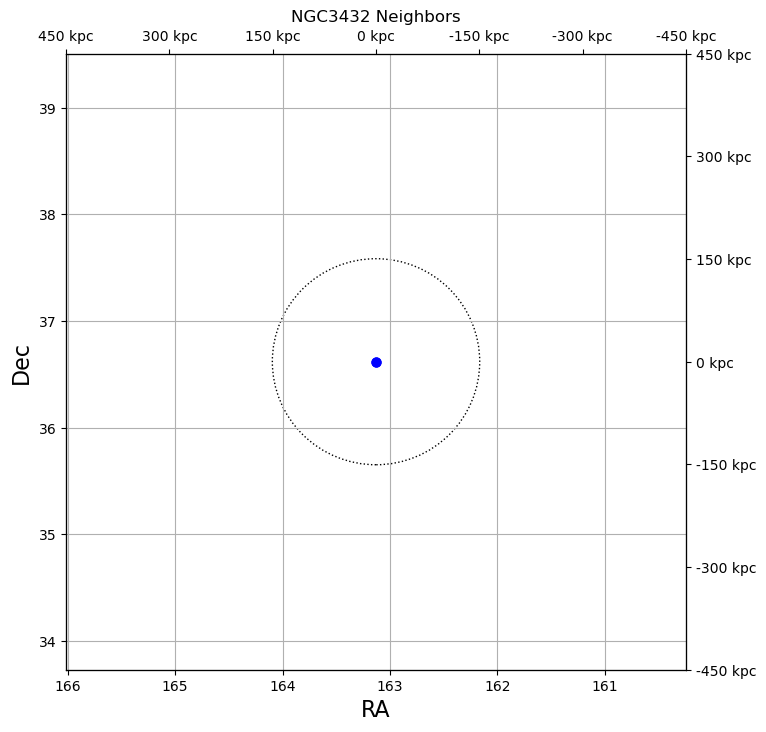

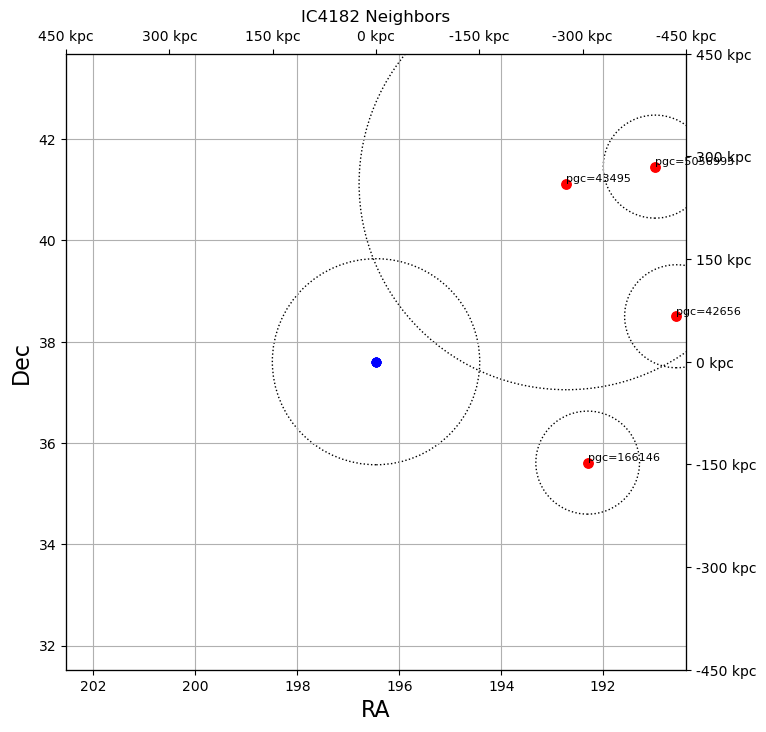

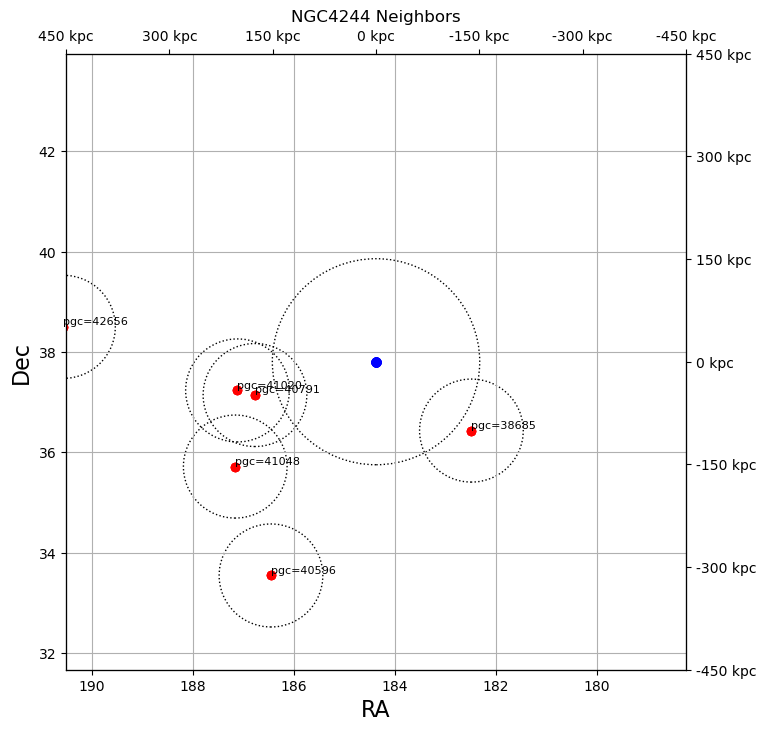

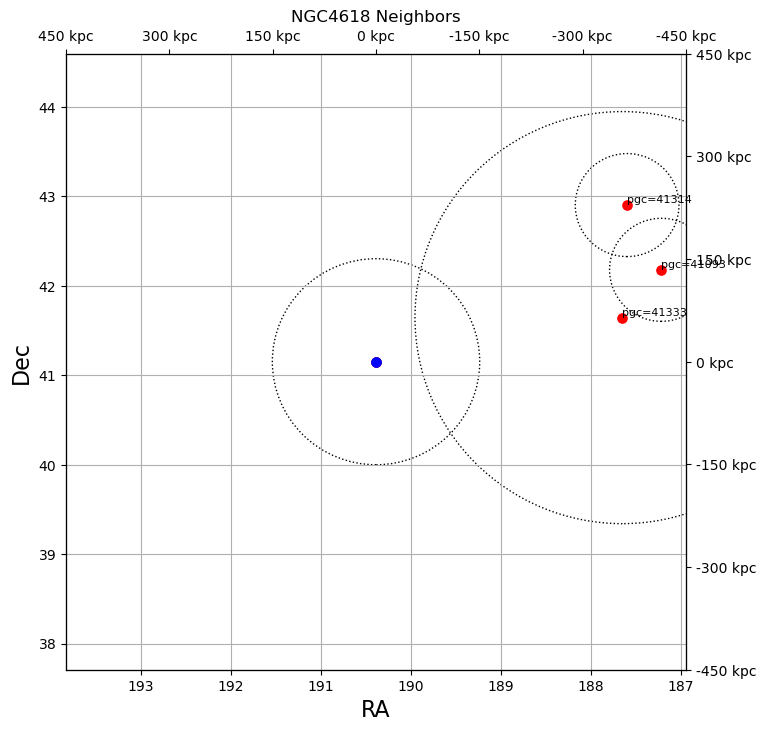

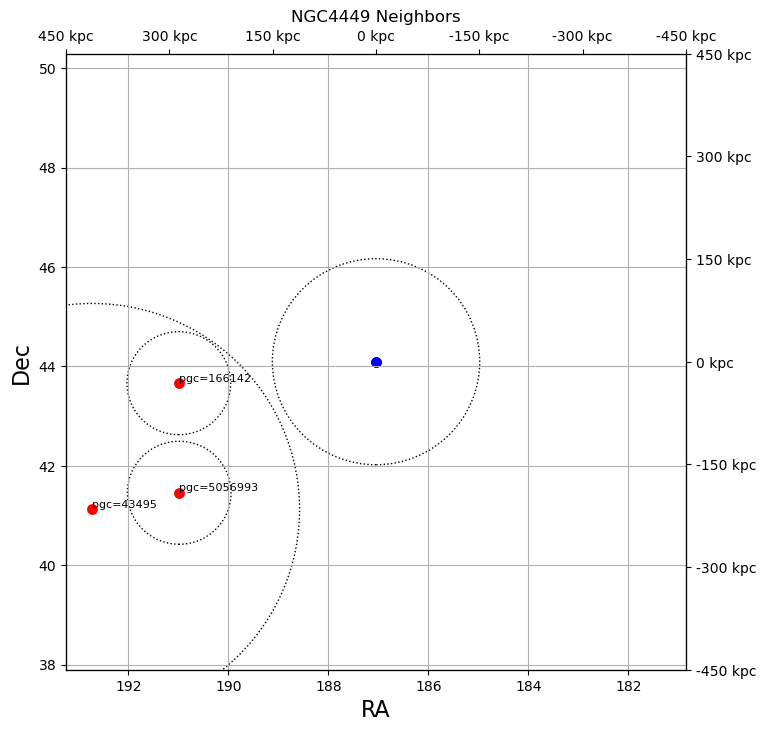

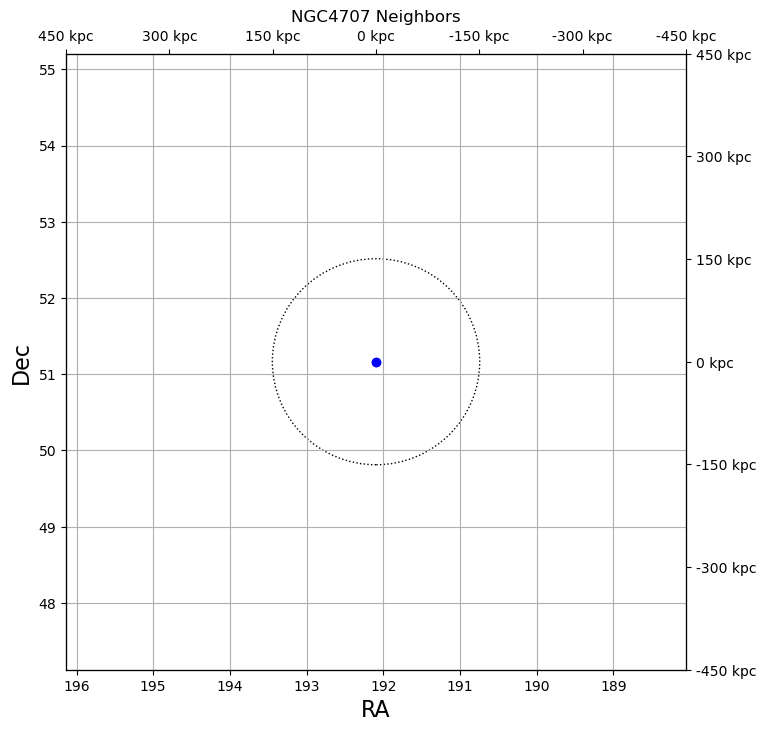

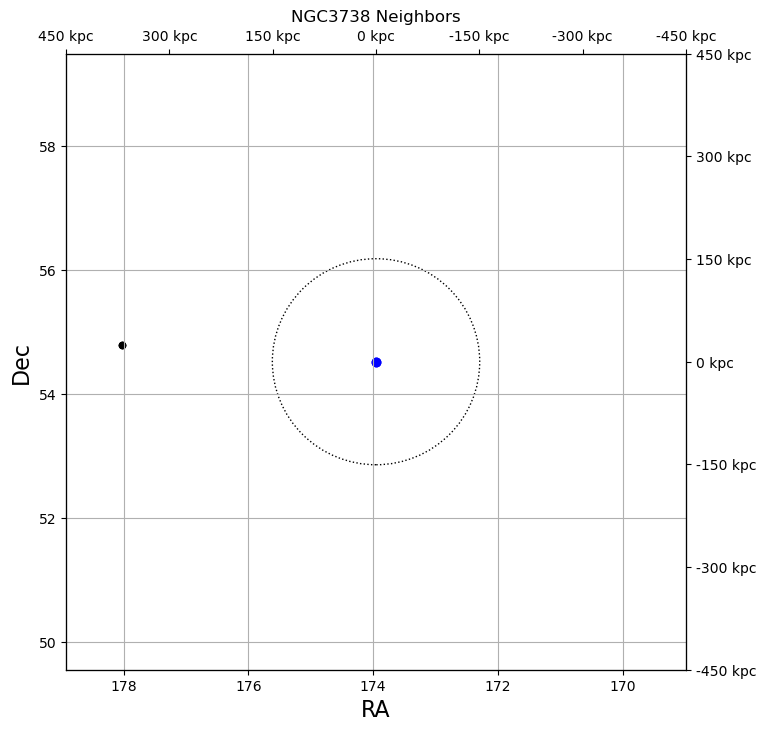

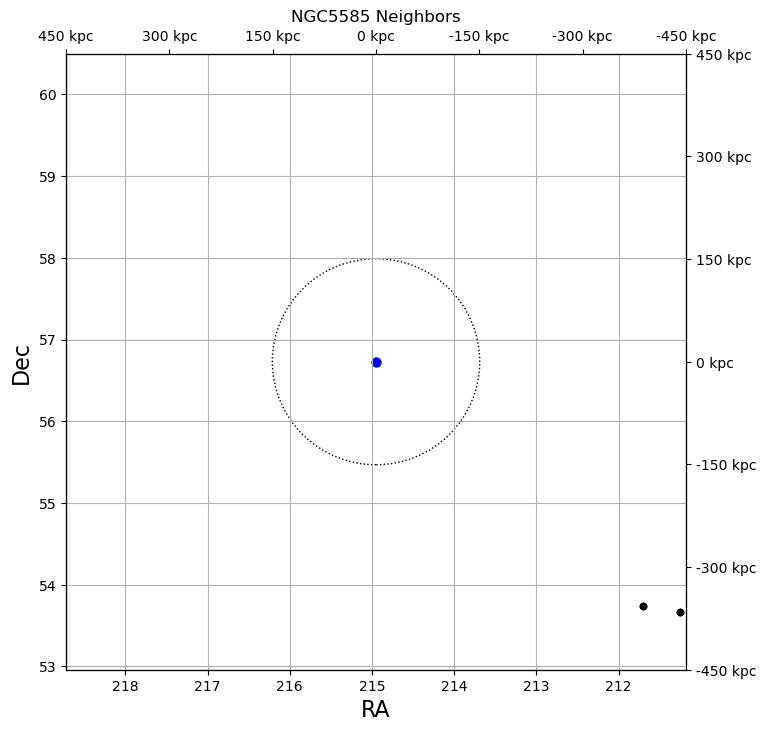

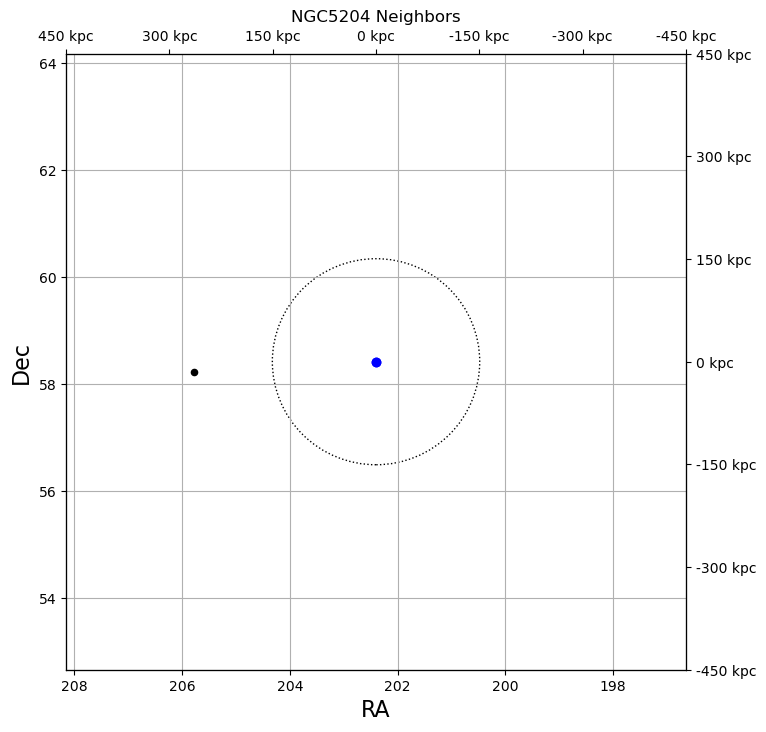

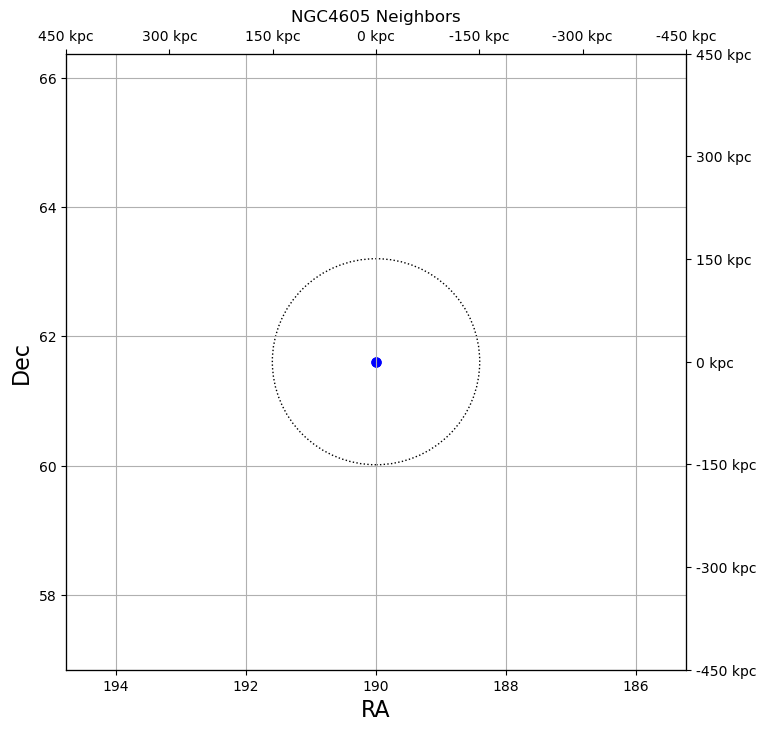

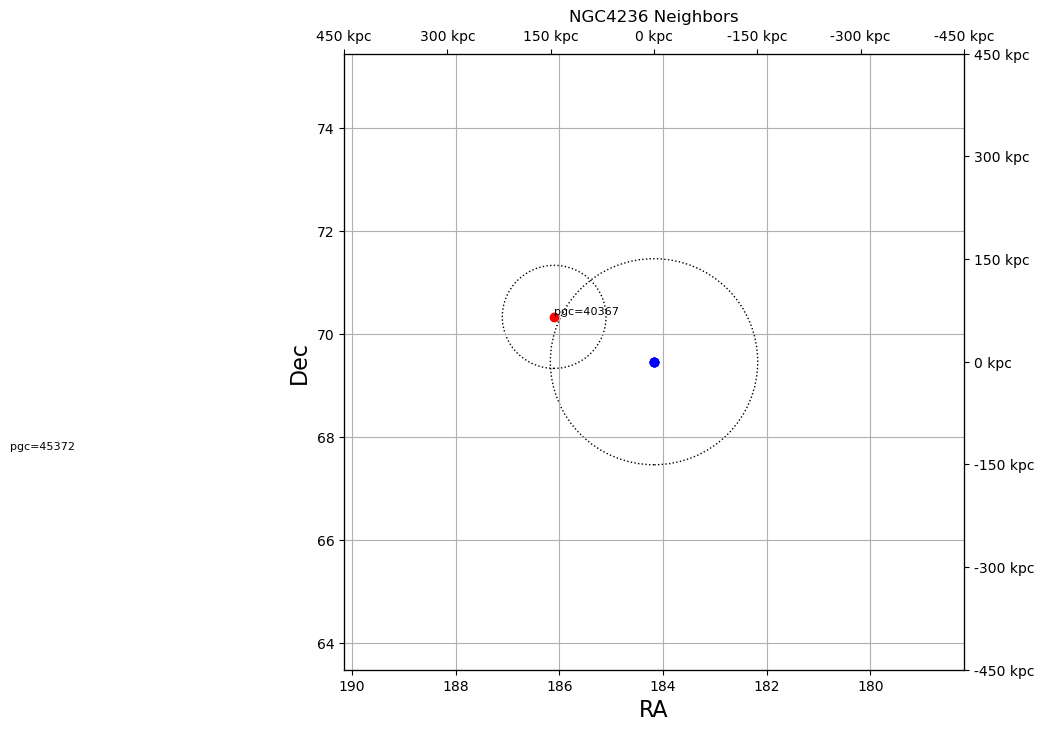

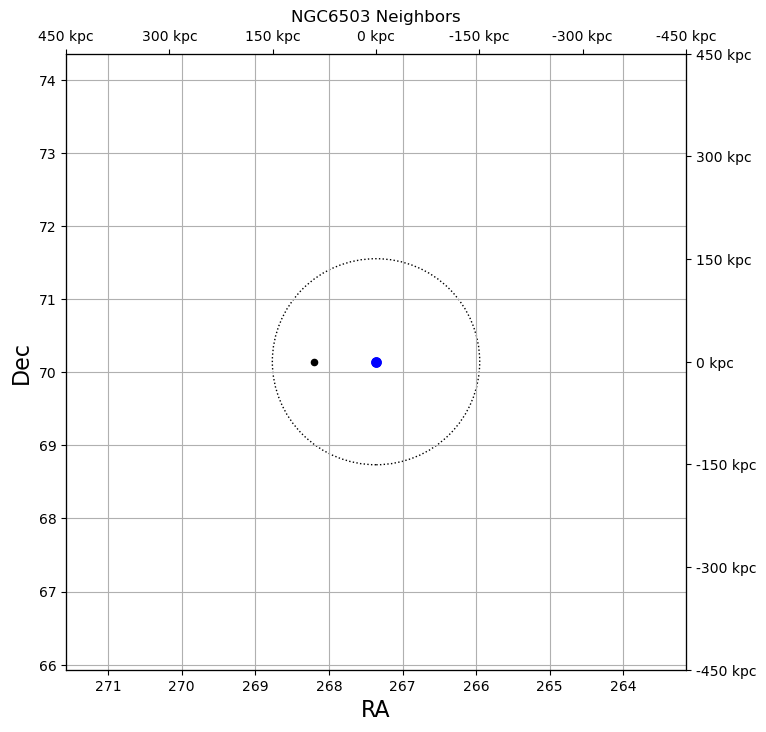

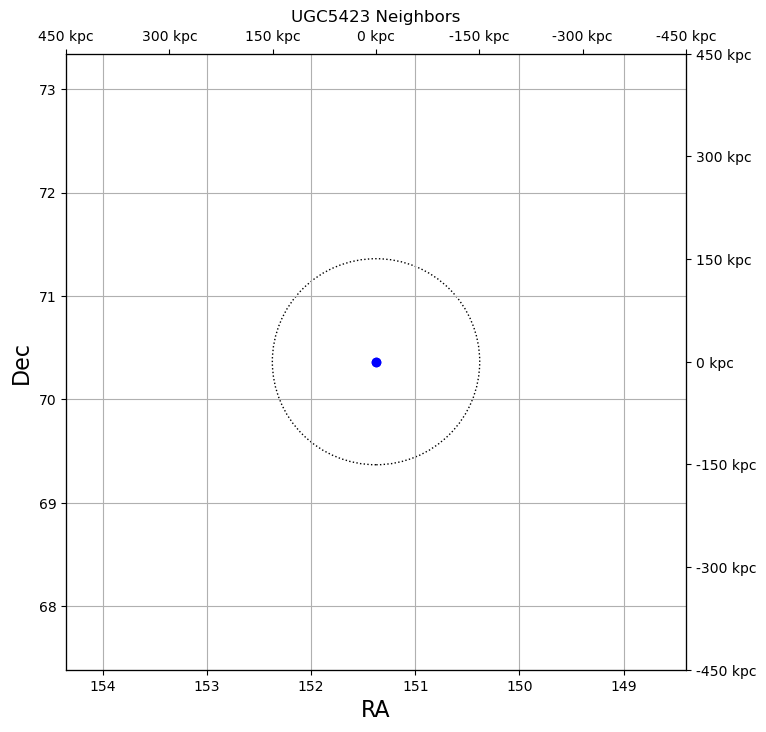

In [27]:
file_names = [
    'IC5052_nearby.csv', 'IC4951_nearby.csv', 'ESO154-G23_nearby.csv', 'NGC7090_nearby.csv', 
    'IC1959_nearby.csv', 'ESO245-G05_nearby.csv', 'NGC0625_nearby.csv', 'HIPASSJ0607-34_nearby.csv',
    'NGC2188_nearby.csv', 'ESO364-G29_nearby.csv', 'ESO486-G21_nearby.csv', 'NGC0024_nearby.csv', 
    'NGC4826_nearby.csv', 'NGC4455_nearby.csv', 'IC1727_nearby.csv', 'NGC0672_nearby.csv',
    'NGC0784_nearby.csv', 'NGC4395_nearby.csv', 'NGC4861_nearby.csv', 'NGC3432_nearby.csv', 
    'IC4182_nearby.csv', 'NGC4244_nearby.csv', 'NGC4618_nearby.csv', 'NGC4449_nearby.csv',
    'NGC4707_nearby.csv', 'NGC3738_nearby.csv', 'NGC5585_nearby.csv', 'NGC5204_nearby.csv', 
    'NGC4605_nearby.csv', 'NGC4236_nearby.csv', 'NGC6503_nearby.csv', 'UGC05423_nearby.csv'
]
count = 0
kpc_range = 450
for file_name in file_names:
    dtype = [('RA', float), ('Dec', float), ('pcg', float), ('k_mag', float), ('Separation', float), ('DM', float)]
    neighbors = np.genfromtxt(file_name, names=['RA', 'Dec', 'pcg', 'k_mag', 'Separation', 'DM'], delimiter=',', dtype=dtype)
    neighbors = np.atleast_1d(neighbors)  # Ensure array is at least one-dimensional
   
   
    if neighbors.size == 1: #needs more than one to concatonate. this is a dummy point
        new_record = np.array([(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)], dtype=dtype)
        neighbors = np.concatenate([neighbors, new_record])        

    neighbor_ra = neighbors['RA']
    neighbor_dec= neighbors['Dec']
    
    center_ra = df.at[count, 'RA']
    center_dec = df.at[count, 'Dec']
    centerk = abs(df.at[count, 'M_K']) 
    d = df.at[count, 'Distance']
    name = df.at[count, 'Galaxy']
    degrees_range = (324/(np.pi*2*d))/2 # /2 because we want to center the target in degree range 
#Which comes from rearrange of degree arclegnth formula:
#pi*2*d(x/360)=.9

    fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size to make it square
    ax.set_title( name + ' Neighbors')
    ax.scatter(center_ra, center_dec, color='b', s=centerk*2)

    # Set the limits for the plot
    ax.set_xlim(center_ra - degrees_range, center_ra + degrees_range)
    ax.set_ylim(center_dec - degrees_range, center_dec + degrees_range)

    # Add gridlines
    ax.grid(True)
    std_frame = 6.577321627777308
    zoom_frac =  degrees_range/std_frame
    radius1 = 1.1*zoom_frac
    radius2 = 2.2*zoom_frac
    radius4 = 4.4*zoom_frac
    
    # Create a circle centered at (center_ra, center_dec) with a radius in degrees
    circlec = Circle((center_ra, center_dec), radius2,  edgecolor='black', facecolor='none', linestyle='dotted', linewidth=1)
    ax.add_patch(circlec) #adjust when k mags come in

    if neighbor_ra.ndim != 0:
        for ra, dec, k_mag, dm, pcg in zip(neighbor_ra, neighbor_dec, neighbors['k_mag'], neighbors['DM'],neighbors['pcg']):
            pcg = int(pcg) 
            if pcg == 1 : #skip the dummies
                continue                
            if np.any(np.isnan(neighbors['k_mag'])):  # Check if there's any nan in k_mag
                ax.scatter(neighbor_ra, neighbor_dec, color='black', s=20 ) # plot the missing k magnitudes as black and without virial radius
                continue        
            k_band = abs(k_mag - dm)  # Now k_band is calculated correctly for each neighbor
            k_band = np.round(k_band).astype(int)
            #if duplicate continue
            if abs(ra - center_ra) <= 0.1 and abs(dec - center_dec) <=.095:
                    continue 
            ax.text(ra, dec, f'pgc={pcg}', color='black', fontsize=8, ha='left', va='bottom') #, ha='left', va='bottom'

            # Now use k_band in your condition
            if k_band > 21.5:
                circle = Circle((ra, dec), radius4, edgecolor='black', facecolor='none', linestyle='dotted', linewidth=1)
                ax.add_patch(circle)
                
            elif k_band < 19.5:
                circle = Circle((ra, dec), radius1, edgecolor='black', facecolor='none', linestyle='dotted', linewidth=1)
                ax.add_patch(circle)
            else:
                circle = Circle((ra, dec), radius2, edgecolor='black', facecolor='none', linestyle='dotted', linewidth=1)
                ax.add_patch(circle)
            
            ax.scatter(neighbor_ra, neighbor_dec, color='r', s=k_band*2 )
            ax.scatter(center_ra, center_dec, color='b', s=centerk*2)
    
    ax.scatter(center_ra, center_dec, color='b', s=centerk*2)

        # Create a second scale for kpc
    x_ticks = np.linspace(center_ra - degrees_range, center_ra + degrees_range, 7)
    y_ticks = np.linspace(center_dec - degrees_range, center_dec + degrees_range, 7)
    x_tick_labels = np.linspace(-kpc_range, kpc_range, 7)
    y_tick_labels = np.linspace(-kpc_range, kpc_range, 7)

    ax2 = ax.twiny()  # Create a second x-axis
    ax2.set_xlim(ax.get_xlim())  # Set the limits to match the original x-axis
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(['{:.0f} kpc'.format(label) for label in x_tick_labels])

    ax3 = ax.twinx()  # Create a second y-axis
    ax3.set_ylim(ax.get_ylim()) # Set the limits to match the original y-axis
    ax3.set_yticks(y_ticks)
    ax3.set_yticklabels(['{:.0f} kpc'.format(label) for label in y_tick_labels]) 
    ax.set_xlabel('RA', fontsize=16)
    ax.set_ylabel('Dec', fontsize=16)
    
    ax.invert_xaxis()  # invert both x axis
    ax2.invert_xaxis()
    count +=1